<a href="https://colab.research.google.com/github/NikhilGurrapu/Polynomial_Regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [17]:
X = 6 * np.random.rand(200,1) -3
y = 0.7* X**2 + 0.9*X + 2 + np.random.randn(200,1)

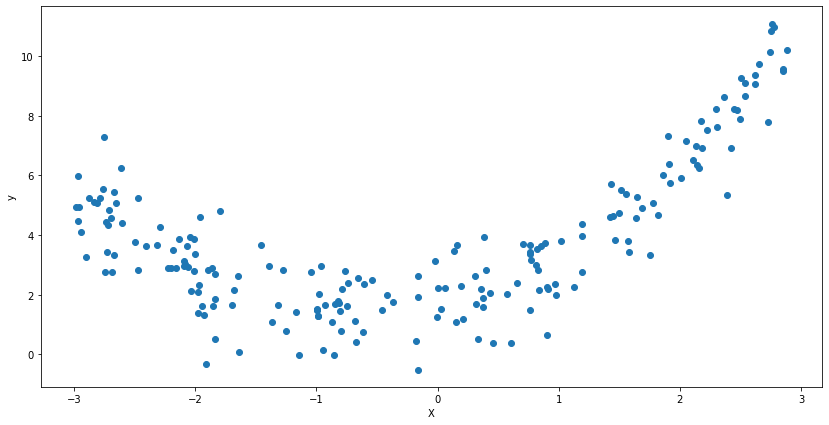

In [18]:
plt.figure(figsize=(14,7))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# splitting train and test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.22539270926516153

In [21]:
print(reg.coef_,"\n\n",reg.intercept_)

[[0.71352203]] 

 [3.87010717]


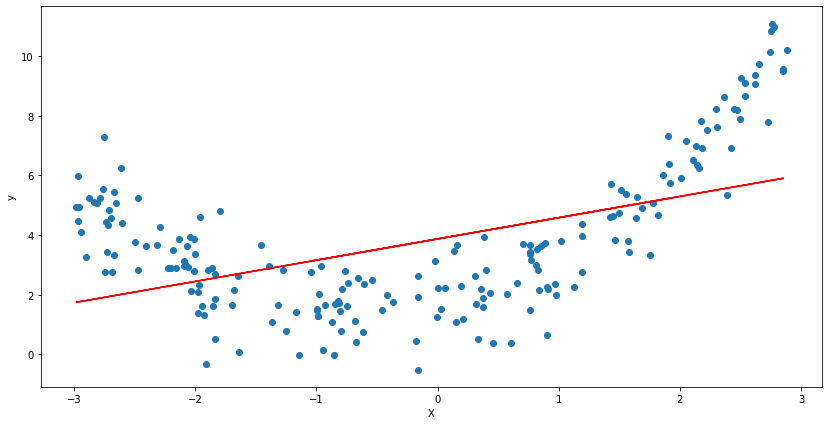

In [22]:
plt.figure(figsize=(14,7))
plt.scatter(X,y)
plt.plot(X_train,reg.predict(X_train),color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Polynomial Regression
## degree = 2

In [23]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_tnf = poly.fit_transform(X_train)
X_test_tnf = poly.transform(X_test)

In [24]:
print(X_train[0])
print(X_train_tnf[0])

[-1.04223349]
[ 1.         -1.04223349  1.08625065]


In [25]:
lr=LinearRegression()
lr.fit(X_train_tnf,y_train)
y_pred = lr.predict(X_test_tnf)
r2_score(y_test,y_pred)

0.8876331317635513

In [26]:
print(lr.coef_,"\n\n",lr.intercept_)

[[0.         0.88827741 0.70921384]] 

 [1.67434418]


In [27]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

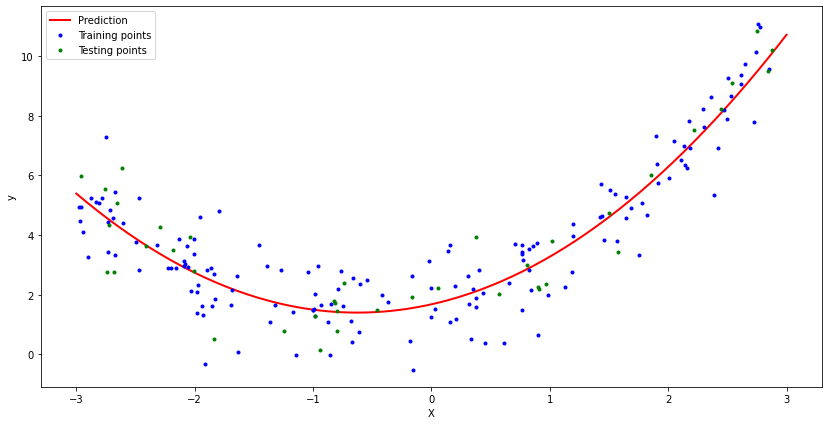

In [28]:
plt.figure(figsize=(14,7))
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prediction")
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()